Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as exp
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MSSubClass'].plot(kind='hist', bins=20, title='MSSubClass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LotFrontage'].plot(kind='hist', bins=20, title='LotFrontage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('MSZoning').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Street').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Alley').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('LotShape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Id', y='MSSubClass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='MSSubClass', y='LotFrontage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='LotFrontage', y='LotArea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MSSubClass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MSZoning')):
  _plot_series(series, series_name, i)
  fig.legend(title='MSZoning', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MSSubClass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MSSubClass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Street')):
  _plot_series(series, series_name, i)
  fig.legend(title='Street', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MSSubClass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MSSubClass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Alley')):
  _plot_series(series, series_name, i)
  fig.legend(title='Alley', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MSSubClass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MSSubClass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LotShape')):
  _plot_series(series, series_name, i)
  fig.legend(title='LotShape', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MSSubClass')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['MSSubClass'].plot(kind='line', figsize=(8, 4), title='MSSubClass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['LotFrontage'].plot(kind='line', figsize=(8, 4), title='LotFrontage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Street'].value_counts()
    for x_label, grp in _df_20.groupby('MSZoning')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MSZoning')
_ = plt.ylabel('Street')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Alley'].value_counts()
    for x_label, grp in _df_21.groupby('Street')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Street')
_ = plt.ylabel('Alley')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LotShape'].value_counts()
    for x_label, grp in _df_22.groupby('Alley')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Alley')
_ = plt.ylabel('LotShape')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LandContour'].value_counts()
    for x_label, grp in _df_23.groupby('LotShape')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LotShape')
_ = plt.ylabel('LandContour')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['MSZoning'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='MSZoning', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Street'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='Street', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Alley'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Alley', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['LotShape'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='LotShape', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


from matplotlib import pyplot as plt
_df_28['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['MSSubClass'].plot(kind='hist', bins=20, title='MSSubClass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['LotFrontage'].plot(kind='hist', bins=20, title='LotFrontage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['LotArea'].plot(kind='hist', bins=20, title='LotArea')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='Id', y='MSSubClass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='MSSubClass', y='LotFrontage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='LotFrontage', y='LotArea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='LotArea', y='OverallQual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['MSSubClass'].plot(kind='line', figsize=(8, 4), title='MSSubClass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['LotFrontage'].plot(kind='line', figsize=(8, 4), title='LotFrontage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['LotArea'].plot(kind='line', figsize=(8, 4), title='LotArea')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='Id', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='MSSubClass', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='LotFrontage', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='LotArea', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
print(df.isna().sum().sort_values(ascending=False).head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [10]:
# Cloumns required to calculate and predict the sales price as per the problem statement.

columns_needed = [
    "LotArea",
    "OverallQual",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
]
target = ["SalePrice"]

In [12]:
X = df[columns_needed]
y = np.log1p(df[target])

In [13]:
# checks for the Nan values in the required columns
X.isna().sum()


,0
LotArea,0
OverallQual,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0
TotalBsmtSF,0


In [14]:
# checks for the Nan values in the targeted
y.isna().sum()


,0
SalePrice,0


In [15]:
test_df = pd.read_csv("test.csv")
test_X = test_df[columns_needed]
test_X.isna().sum()

,0
LotArea,0
OverallQual,0
BsmtFullBath,2
BsmtHalfBath,2
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0
TotalBsmtSF,1


In [16]:
# filling the missing values in Nan columns
test_X.BsmtFullBath.fillna(0, inplace=True)
test_X.BsmtHalfBath.fillna(0, inplace=True)
test_X.TotalBsmtSF.fillna(test_X.TotalBsmtSF.mean(), inplace=True)

In [17]:
test_X.isna().sum()


,0
LotArea,0
OverallQual,0
BsmtFullBath,0
BsmtHalfBath,0
FullBath,0
HalfBath,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0
TotalBsmtSF,0


In [18]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)


In [19]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((1095, 14), (365, 14), (1095, 1), (365, 1))

In [20]:
# Linear Regression model
model = LinearRegression()
model.fit(train_X, train_y)
model.score(train_X, train_y) # score determines how well the linear regression suits the training data

0.7973258730751758

In [21]:
# This score shows how well the model generalizes to new, unseen data
model.score(val_X, val_y)

0.8385738612280829

In [24]:
# measures the average magnitude of the prediction errors, giving an idea of how well the model predicts new data
mean_squared_error(val_y, model.predict(val_X), squared=False)


0.16718875901714517

In [25]:
mean_squared_error(train_y, model.predict(train_X), squared=False)

0.17706151928523386

In [32]:
pd.concat([test_df.Id, pd.DataFrame(model.predict(test_X))], axis=1).to_csv(
    "submission.csv", index=False, header=["Id", "SalePrice"]
)



In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define a pipeline with preprocessing
pipeline = Pipeline([
    ('preprocessor', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define estimators with pipelines
estimators = [
    ("lr1", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                       ('scaler', StandardScaler()),
                       ('regressor', LinearRegression())])),
    ("lr2", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                       ('scaler', StandardScaler()),
                       ('regressor', Ridge(random_state=42))])),
    ("lr3", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                       ('scaler', StandardScaler()),
                       ('regressor', Lasso(random_state=42))])),
    ("lr4", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                       ('scaler', StandardScaler()),
                       ('regressor', ElasticNet(random_state=42))])),
    ("rt", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                      ('scaler', StandardScaler()),
                      ('regressor', RandomForestRegressor(random_state=42))])),
    ("gb", Pipeline([('preprocessor', SimpleImputer(strategy='mean')),
                      ('scaler', StandardScaler()),
                      ('regressor', GradientBoostingRegressor(random_state=42))])),
]

# Define the stacking model with a final linear regressor
stacking_model = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression()
)

# Fit the stacking model
stacking_model.fit(train_X, train_y)

# Evaluate using cross-validation
cv_scores = cross_val_score(stacking_model, train_X, train_y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Mean RMSE from cross-validation: {-cv_scores.mean()}")

# Predict and evaluate on the validation set
stacking_pred = stacking_model.predict(val_X)
rmse = mean_squared_error(val_y, stacking_pred, squared=False)
print(f"Validation RMSE: {rmse}")


Mean RMSE from cross-validation: 0.16956369333823265
Validation RMSE: 0.15333771672008756


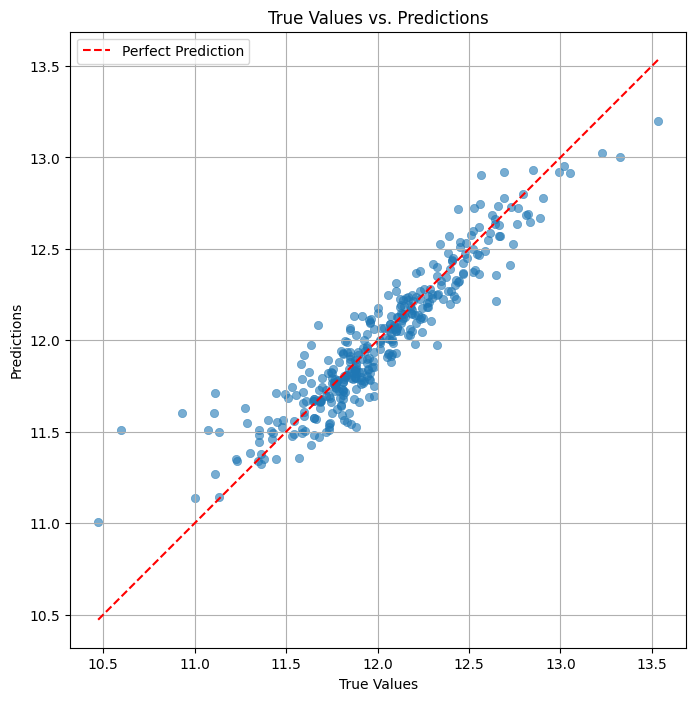

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# If val_y and stacking_pred are pandas Series or DataFrames
if hasattr(val_y, 'values'):
    val_y_flat = val_y.values.ravel()
else:
    val_y_flat = val_y.ravel()

if hasattr(stacking_pred, 'values'):
    stacking_pred_flat = stacking_pred.values.ravel()
else:
    stacking_pred_flat = stacking_pred.ravel()

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create scatter plot
sns.scatterplot(x=val_y_flat, y=stacking_pred_flat, alpha=0.6, edgecolor=None)

# Add a line for perfect predictions
plt.plot([val_y_flat.min(), val_y_flat.max()], [val_y_flat.min(), val_y_flat.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add labels and title
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")

# Set equal scaling
plt.gca().set_aspect('equal', adjustable='box')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show plot
plt.show()


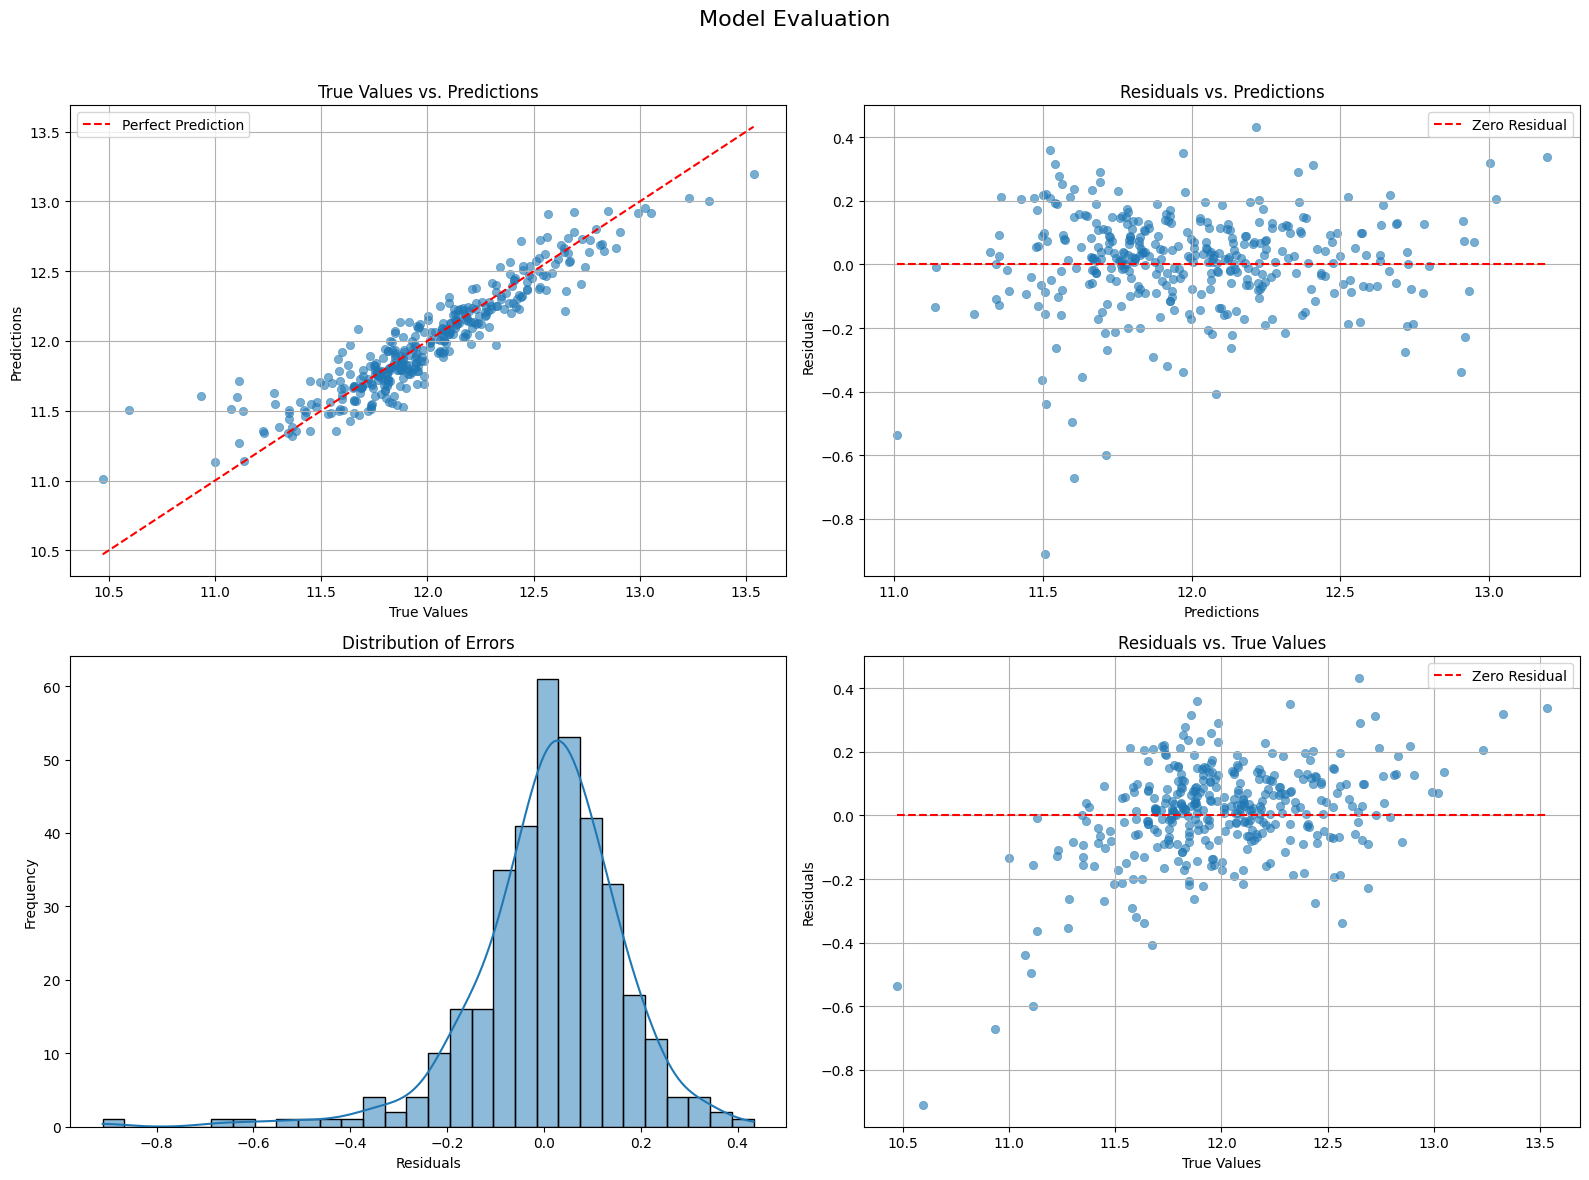

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the arrays
val_y_flat = val_y.values.ravel() if hasattr(val_y, 'values') else val_y.ravel()
stacking_pred_flat = stacking_pred.values.ravel() if hasattr(stacking_pred, 'values') else stacking_pred.ravel()

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Model Evaluation", fontsize=16)

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=val_y_flat, y=stacking_pred_flat, alpha=0.6, edgecolor=None, ax=axes[0, 0])
axes[0, 0].plot([val_y_flat.min(), val_y_flat.max()], [val_y_flat.min(), val_y_flat.max()], color='red', linestyle='--', label='Perfect Prediction')
axes[0, 0].set_xlabel("True Values")
axes[0, 0].set_ylabel("Predictions")
axes[0, 0].set_title("True Values vs. Predictions")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Residual Plot
residuals = val_y_flat - stacking_pred_flat
sns.scatterplot(x=stacking_pred_flat, y=residuals, alpha=0.6, edgecolor=None, ax=axes[0, 1])
axes[0, 1].hlines(0, xmin=stacking_pred_flat.min(), xmax=stacking_pred_flat.max(), colors='red', linestyle='--', label='Zero Residual')
axes[0, 1].set_xlabel("Predictions")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("Residuals vs. Predictions")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Distribution of Errors
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel("Residuals")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Distribution of Errors")

# Error vs. True Values
sns.scatterplot(x=val_y_flat, y=residuals, alpha=0.6, edgecolor=None, ax=axes[1, 1])
axes[1, 1].hlines(0, xmin=val_y_flat.min(), xmax=val_y_flat.max(), colors='red', linestyle='--', label='Zero Residual')
axes[1, 1].set_xlabel("True Values")
axes[1, 1].set_ylabel("Residuals")
axes[1, 1].set_title("Residuals vs. True Values")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
